<a href="https://colab.research.google.com/github/park-geun-hyeong/TimeSeries/blob/main/Preprocessing/KalmanFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
! pip install simdkalman

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import simdkalman
import random

%matplotlib inline
sns.set_style('whitegrid')

import os
from sklearn.metrics import r2_score

path = '/content/drive/MyDrive/TimeSeries/2week/'
os.chdir(path)

## Kalman Filter
- when too much noise

In [41]:
kf = simdkalman.KalmanFilter(
    state_transition = np.array([[1,1],[1,0]]),
    process_noise = np.diag([0.1, 0.01]),
    observation_model = np.array([[1,0]]),
    observation_noise = 1.0
)

In [42]:
rand = lambda : np.random.normal(size=(100,200))
data = np.cumsum(np.cumsum(rand() * 0.02, axis = 1) + rand(), axis=1) + rand()*3

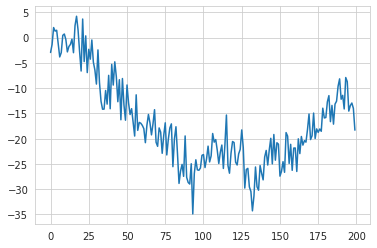

In [43]:
plt.plot(data[0])

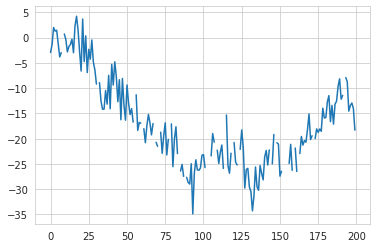

In [44]:
data[np.random.uniform(size= data.shape) < 0.1] = np.nan
plt.plot(data[0])

In [45]:
kf = kf.em(data, n_iter=10)
smoothe = kf.smooth(data)
pred= kf.predict(data, 15)

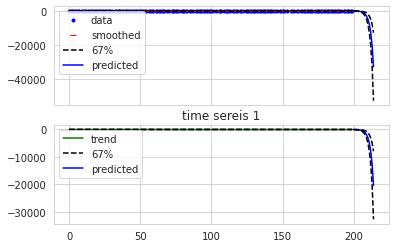

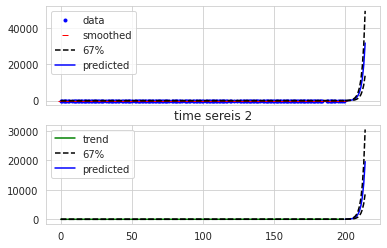

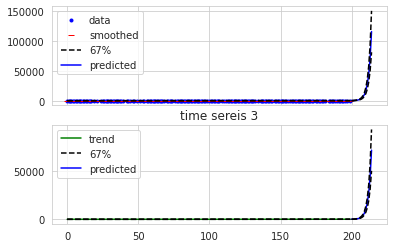

In [47]:
for i in range(3):

    _, (ax1, ax2)  = plt.subplots(2,1, sharex = True)
    plt.title(f"time sereis {i+1}")

    x= np.arange(0, data.shape[1])
    ax1.plot(x, data[i,:], 'b.', label='data')

    smoothed_obs = smoothe.observations.mean[i,:]
    obs_stdev = np.sqrt(smoothe.observations.cov[i,:])
    ax1.plot(x, smoothed_obs, 'r_', label='smoothed')
    ax1.plot(x, smoothed_obs - obs_stdev, 'k--', label='67%')
    ax1.plot(x, smoothed_obs + obs_stdev, 'k--')

    x_pred = np.arange(data.shape[1], data.shape[1] + pred.observations.mean.shape[1])
    y_pred = pred.observations.mean[i,:]
    pred_stdev = np.sqrt(pred.observations.cov[i,:])

    ax1.plot(x_pred, y_pred, 'b-', label= 'predicted')
    ax1.plot(x_pred, y_pred + pred_stdev, 'k--')
    ax1.plot(x_pred, y_pred  - pred_stdev, 'k--')

    ax1.legend()

    trend = smoothe.states.mean[i,:,1]
    trend_stdev = np.sqrt(smoothe.states.cov[i,:,1,1])
    ax2.plot(x, trend, 'g-', label='trend')
    ax2.plot(x, trend - trend_stdev, 'k--', label="67%")
    ax2.plot(x, trend + trend_stdev, 'k--')

    trend_pred = pred.states.mean[i,:,1]
    trend_pred_stdev = np.sqrt(pred.states.cov[i,:,1,1])
    ax2.plot(x_pred, trend_pred, 'b-', label= 'predicted')
    ax2.plot(x_pred, trend_pred + trend_pred_stdev, 'k--')
    ax2.plot(x_pred, trend_pred  - trend_pred_stdev, 'k--')
    ax2.legend()

    plt.show()